<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [3]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [6]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [7]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [8]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [9]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [10]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [11]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [12]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])

In [14]:
df = df.drop(['ID'], axis = 1)

### Task 4: Data Prep & Start H2O

In [15]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp72zj7ed_
  JVM stdout: /tmp/tmp72zj7ed_/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmp72zj7ed_/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_rhyme_tf363y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [16]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [20]:
train, test = h2o_df.split_frame(ratios=[.75])
x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [24]:
from h2o.automl import H2OAutoML

In [26]:
aml = H2OAutoML(max_runtime_secs=600,
               balance_classes=True, ## when in binary variables the numbers are not same
                stopping_metric='logloss',
               project_name='Final',
               seed=1)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 20s, sys: 1.21 s, total: 1min 21s
Wall time: 9min 50s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [28]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200802_185430,0.934884,0.218667,0.620482,0.167722,0.255025,0.0650377
XGBoost_grid__1_AutoML_20200802_185430_model_2,0.934311,0.198445,0.618191,0.160593,0.249574,0.0622874
StackedEnsemble_AllModels_AutoML_20200802_185430,0.933607,0.212042,0.618394,0.174742,0.252869,0.0639426
XGBoost_3_AutoML_20200802_185430,0.930751,0.202797,0.60855,0.188208,0.251291,0.0631471
XGBoost_grid__1_AutoML_20200802_185430_model_1,0.930498,0.20402,0.601648,0.178098,0.252546,0.0637795
GBM_grid__1_AutoML_20200802_185430_model_1,0.93049,0.202492,0.601497,0.192987,0.252281,0.0636459
GBM_grid__1_AutoML_20200802_185430_model_2,0.930478,0.20877,0.60452,0.168415,0.256619,0.0658532
GBM_2_AutoML_20200802_185430,0.928224,0.226897,0.59577,0.167704,0.267408,0.0715072
XGBoost_grid__1_AutoML_20200802_185430_model_5,0.927579,0.208595,0.606119,0.188223,0.252746,0.0638807
XGBoost_grid__1_AutoML_20200802_185430_model_4,0.926783,0.215002,0.589303,0.1745,0.259145,0.0671559


In [29]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [30]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20200802_185430_model_2',
  0.7656230418732377,
  1.0,
  0.5165333507119657),
 ('GBM_grid__1_AutoML_20200802_185430_model_1',
  0.6169339750019074,
  0.8057933751477292,
  0.4162191520465605),
 ('DRF_1_AutoML_20200802_185430',
  0.05358800227126997,
  0.06999267177246528,
  0.036153549275914305),
 ('XRT_1_AutoML_20200802_185430',
  0.03728331802351009,
  0.04869670318736697,
  0.02515347126599672),
 ('DeepLearning_grid__1_AutoML_20200802_185430_model_1',
  0.008805173634243156,
  0.011500664364410556,
  0.005940476699562684),
 ('GLM_1_AutoML_20200802_185430', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [31]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20200802_185430_model_2')

In [32]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06175307238849201
RMSE: 0.2485016546997062
LogLoss: 0.196303649393174
Mean Per-Class Error: 0.12484036905240203
AUC: 0.9364194643933307
AUCPR: 0.6482120595485872
Gini: 0.8728389287866614

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24598324547211328: 


,,no,yes,Error,Rate
0,no,9065.0,891.0,0.0895,(891.0/9956.0)
1,yes,286.0,1058.0,0.2128,(286.0/1344.0)
2,Total,9351.0,1949.0,0.1042,(1177.0/11300.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.245983,0.642575,232.0
1,max f2,0.149405,0.751626,274.0
2,max f0point5,0.476652,0.621444,145.0
3,max accuracy,0.476652,0.910088,145.0
4,max precision,0.981048,1.000000,0.0
5,max recall,0.000637,1.000000,397.0
6,max specificity,0.981048,1.000000,0.0
7,max absolute_mcc,0.241334,0.598140,234.0
8,max min_per_class_accuracy,0.151246,0.871334,273.0
9,max mean_per_class_accuracy,0.120504,0.875160,289.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 11.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.886074,7.142857,7.142857,0.849558,0.925282,0.849558,0.925282,0.071429,0.071429,614.285714,614.285714
1,,2,0.02,0.825291,6.622024,6.882440,0.787611,0.855486,0.818584,0.890384,0.066220,0.137649,562.202381,588.244048
2,,3,0.03,0.755291,6.250000,6.671627,0.743363,0.790154,0.793510,0.856974,0.062500,0.200149,525.000000,567.162698
3,,4,0.04,0.698404,5.803571,6.454613,0.690265,0.727359,0.767699,0.824570,0.058036,0.258185,480.357143,545.461310
4,,5,0.05,0.651131,4.910714,6.145833,0.584071,0.674747,0.730973,0.794606,0.049107,0.307292,391.071429,514.583333
5,,6,0.10,0.455636,4.642857,5.394345,0.552212,0.552110,0.641593,0.673358,0.232143,0.539435,364.285714,439.434524
6,,7,0.15,0.302637,3.437500,4.742063,0.408850,0.376415,0.564012,0.574377,0.171875,0.711310,243.750000,374.206349
7,,8,0.20,0.182315,2.678571,4.226190,0.318584,0.240011,0.502655,0.490785,0.133929,0.845238,167.857143,322.619048
8,,9,0.30,0.068863,1.041667,3.164683,0.123894,0.114528,0.376401,0.365366,0.104167,0.949405,4.166667,216.468254
9,,10,0.40,0.030466,0.252976,2.436756,0.030088,0.046259,0.289823,0.285589,0.025298,0.974702,-74.702381,143.675595


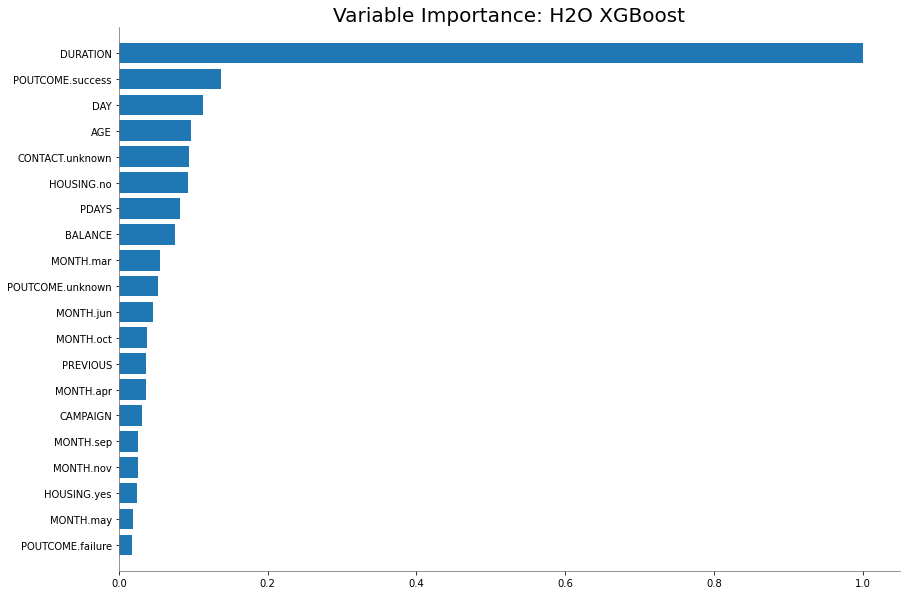

In [35]:
model.varimp_plot(num_of_features=20)

In [34]:
model.varimp_plot?

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200802_185430_model_2


Model Summary: 


,,number_of_trees
0,,73.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.049196116202566094
RMSE: 0.2218019751998753
LogLoss: 0.16117133703694886
Mean Per-Class Error: 0.1032201048810113
AUC: 0.9594361738402805
AUCPR: 0.7683110359963047
Gini: 0.9188723476805609

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30801979968181026: 


,,no,yes,Error,Rate
0,no,28162.0,1804.0,0.0602,(1804.0/29966.0)
1,yes,828.0,3117.0,0.2099,(828.0/3945.0)
2,Total,28990.0,4921.0,0.0776,(2632.0/33911.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.308020,0.703136,214.0
1,max f2,0.176029,0.784205,269.0
2,max f0point5,0.559733,0.724840,125.0
3,max accuracy,0.464919,0.931586,156.0
4,max precision,0.980298,1.000000,0.0
5,max recall,0.001213,1.000000,396.0
6,max specificity,0.980298,1.000000,0.0
7,max absolute_mcc,0.308020,0.664443,214.0
8,max min_per_class_accuracy,0.178633,0.892478,268.0
9,max mean_per_class_accuracy,0.137859,0.896780,288.0



Gains/Lift Table: Avg response rate: 11.63 %, avg score: 11.64 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010026,0.878831,8.115583,8.115583,0.944118,0.922036,0.944118,0.922036,0.081369,0.081369,711.558264,711.558264
1,,2,0.020023,0.812114,7.885955,8.000938,0.917404,0.844540,0.930781,0.883345,0.078834,0.160203,688.595474,700.093778
2,,3,0.030020,0.755080,7.632387,7.878208,0.887906,0.783686,0.916503,0.850158,0.076299,0.236502,663.238706,687.820822
3,,4,0.040017,0.700929,6.973111,7.652101,0.811209,0.727886,0.890199,0.819612,0.069708,0.306210,597.311110,665.210069
4,,5,0.050013,0.653146,6.922398,7.506246,0.805310,0.676710,0.873231,0.791049,0.069202,0.375412,592.239757,650.624611
5,,6,0.100027,0.456743,5.169731,6.337988,0.601415,0.553199,0.737323,0.672124,0.258555,0.633967,416.973061,533.798836
6,,7,0.150010,0.289730,3.377521,5.351554,0.392920,0.370005,0.622567,0.571457,0.168821,0.802788,237.752145,435.155404
7,,8,0.200024,0.175823,1.880363,4.483628,0.218750,0.227045,0.521598,0.485341,0.094043,0.896831,88.036280,348.362829
8,,9,0.300021,0.065495,0.783293,3.250304,0.091124,0.109251,0.378121,0.359990,0.078327,0.975158,-21.670694,225.030445
9,,10,0.400018,0.028793,0.152096,2.475809,0.017694,0.043936,0.288021,0.280983,0.015209,0.990368,-84.790426,147.580937




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.06228741960977245
RMSE: 0.24957447708003408
LogLoss: 0.1984445370191551
Mean Per-Class Error: 0.12852824667280294
AUC: 0.9343110277833255
AUCPR: 0.6181907332932615
Gini: 0.8686220555666511

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24133099425346294: 


,,no,yes,Error,Rate
0,no,27360.0,2606.0,0.087,(2606.0/29966.0)
1,yes,924.0,3021.0,0.2342,(924.0/3945.0)
2,Total,28284.0,5627.0,0.1041,(3530.0/33911.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.241331,0.631216,234.0
1,max f2,0.147783,0.736050,276.0
2,max f0point5,0.444882,0.609554,158.0
3,max accuracy,0.510462,0.909823,134.0
4,max precision,0.979383,0.857143,1.0
5,max recall,0.000571,1.000000,398.0
6,max specificity,0.988067,0.999967,0.0
7,max absolute_mcc,0.211770,0.585999,245.0
8,max min_per_class_accuracy,0.143895,0.865114,278.0
9,max mean_per_class_accuracy,0.091310,0.871472,307.0



Gains/Lift Table: Avg response rate: 11.63 %, avg score: 11.47 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010026,0.869836,6.750344,6.750344,0.785294,0.915228,0.785294,0.915228,0.067681,0.067681,575.034444,575.034444
1,,2,0.020023,0.805478,6.288478,6.519752,0.731563,0.834582,0.758468,0.874965,0.062864,0.130545,528.847838,551.975152
2,,3,0.030020,0.743143,6.161695,6.400516,0.716814,0.773612,0.744597,0.841214,0.061597,0.192142,516.169454,540.051643
3,,4,0.040017,0.690102,5.781343,6.245837,0.672566,0.716230,0.726603,0.809991,0.057795,0.249937,478.134302,524.583715
4,,5,0.050013,0.638219,5.578489,6.112446,0.648968,0.662885,0.711085,0.780587,0.055767,0.305703,457.848888,511.244619
5,,6,0.100027,0.443757,4.703441,5.407944,0.547170,0.535635,0.629127,0.658111,0.235234,0.540938,370.344118,440.794369
6,,7,0.150010,0.280815,3.473877,4.763508,0.404130,0.358613,0.554158,0.558317,0.173638,0.714575,247.387717,376.350831
7,,8,0.200024,0.172834,2.518977,4.202293,0.293042,0.221842,0.488869,0.474186,0.125982,0.840558,151.897658,320.229265
8,,9,0.300021,0.065752,1.051996,3.152297,0.122383,0.110180,0.366719,0.352863,0.105196,0.945754,5.199553,215.229683
9,,10,0.400018,0.030176,0.332076,2.447294,0.038632,0.045200,0.284703,0.275953,0.033207,0.978961,-66.792430,144.729352




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8946064,0.0044368855,0.8968008,0.8894132,0.899882,0.89059275,0.8963433
1,auc,0.9343391,0.0047704466,0.9407931,0.93356794,0.927661,0.9334789,0.93619466
2,aucpr,0.6189885,0.020535456,0.6434089,0.5971198,0.6022596,0.63684446,0.61530995
3,err,0.105393596,0.0044368855,0.10319918,0.110586844,0.10011796,0.10940725,0.10365674
4,err_count,714.8,30.078232,700.0,750.0,679.0,742.0,703.0
5,f0point5,0.56868863,0.012344171,0.5734407,0.5510563,0.5850531,0.5659051,0.56798786
6,f1,0.6328379,0.0060253236,0.64176047,0.6253746,0.63237685,0.63448274,0.63019466
7,f2,0.71382636,0.016340928,0.72856146,0.72286373,0.6880302,0.7219731,0.70770323
8,lift_top_group,6.7977834,0.4474335,7.1340995,6.4262433,6.3660827,7.3877997,6.6746917
9,logloss,0.19844481,0.006943916,0.1889399,0.19879515,0.20794055,0.2007419,0.19580658



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-08-02 18:58:50,55.805 sec,0.0,0.500000,0.693147,0.500000,0.116334,1.000000,0.883666
1,,2020-08-02 18:58:51,56.263 sec,5.0,0.275586,0.284524,0.908814,0.599245,7.229537,0.103683
2,,2020-08-02 18:58:51,56.628 sec,10.0,0.255311,0.226471,0.927288,0.630400,7.357117,0.101678
3,,2020-08-02 18:58:51,56.851 sec,15.0,0.247679,0.205471,0.935943,0.655936,7.565436,0.093509
4,,2020-08-02 18:58:51,57.076 sec,20.0,0.244447,0.196510,0.938714,0.665128,7.407681,0.094335
5,,2020-08-02 18:58:52,57.313 sec,25.0,0.241010,0.190129,0.942392,0.681014,7.609939,0.088113
6,,2020-08-02 18:58:52,57.572 sec,30.0,0.237703,0.184368,0.945561,0.695327,7.685785,0.089352
7,,2020-08-02 18:58:52,57.831 sec,35.0,0.234018,0.178170,0.949407,0.711052,7.862761,0.086757
8,,2020-08-02 18:58:53,58.188 sec,40.0,0.232005,0.175147,0.951075,0.721327,7.913325,0.086226
9,,2020-08-02 18:58:53,58.449 sec,45.0,0.230375,0.172790,0.952487,0.729161,7.913325,0.081213



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DURATION,10445.349609,1.000000,0.438152
1,POUTCOME.success,1430.146851,0.136917,0.059991
2,DAY,1179.869751,0.112956,0.049492
3,AGE,1015.960144,0.097264,0.042617
4,CONTACT.unknown,983.211121,0.094129,0.041243
5,HOUSING.no,977.724854,0.093604,0.041013
6,PDAYS,861.073914,0.082436,0.036120
7,BALANCE,789.124023,0.075548,0.033101
8,MONTH.mar,573.016663,0.054859,0.024036
9,POUTCOME.unknown,553.328735,0.052974,0.023211



See the whole table with table.as_data_frame()


Signature: model.varimp_plot(num_of_features=None, server=False)
Docstring:
Plot the variable importance for a trained model.

:param num_of_features: the number of features shown in the plot (default is 10 or all if less than 10).
:param server: ?

:returns: None.
File:      ~/.local/lib/python3.6/site-packages/h2o/model/model_base.py
Type:      method
